Edge Detection using Sobel Operator
====================================================

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = "assassins-creed-origins-6l.jpg"
img = imread(image)

[nx,ny,c] = img.shape

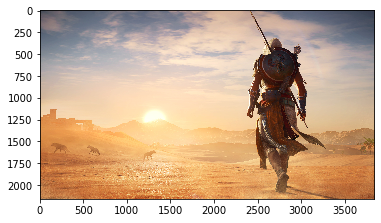

In [3]:
plt.imshow(img)

**Define the Sobel Filters**
1. $G_{x} = \begin{bmatrix} -1.0 & -2.0 & -1.0 \\ 0.0 & 0.0 & 0.0 \\1.0 & 2.0 & 1.0\end{bmatrix}$<br><br>
2. $G_{y} = \begin{bmatrix} -1.0 & 0.0 & 1.0 \\ -2.0 & 0.0 & 2.0 \\-1.0 & 0.0 & 1.0\end{bmatrix}$<br><br>
3. $G_{r} = \sqrt(G_{x}^{2} + G_{y}^{2})$

In [6]:
Gx = [[-1.0,-2.0,-1.0],
      [ 0.0, 0.0, 0.0],
      [ 1.0, 2.0, 1.0]] #Horizontal Filter

Gy = [[-1.0, 0.0, 1.0],
     [-2.0, 0.0, 2.0],
     [-1.0, 0.0, 1.0]] #vertical_filter

gaussian_blurr = [[0.0,1.0,0.0],
                  [1.0,2.0,1.0],
                  [0.0,1.0,0.0]]

# gaussian_blurr = [[1.0,2.0,1.0],
#                   [2.0,4.0,2.0],
#                   [1.0,2.0,1.0]]

In [7]:
new_image = np.zeros_like(img)

**Applying gaussian Blurrer to reduce noisy edges**

In [8]:
for row in range(3, nx-2):
    for col in range(3, ny-2):
        local_pixels = img[row-1:row+2, col-1:col+2,0]
        transformed_pixels = gaussian_blurr*local_pixels
        score = transformed_pixels.sum()
        new_image[row,col] = [score]*3

In [10]:
vertical_edges_img = np.zeros_like(img)
horizontal_edges_img = np.zeros_like(img)

**Horizontal edges**

In [11]:
for row in range(3, nx-2):
    for col in range(3, ny-2):
        local_pixels = new_image[row-1:row+2, col-1:col+2,0]
        transformed_pixels = Gx*local_pixels
        horizontal_score = (transformed_pixels.sum() + 4.0)/8.0
        horizontal_edges_img[row,col] = [horizontal_score]*3 

**Vertical edges**

In [13]:
for row in range(3, nx-2):
    for col in range(3, ny-2):
        local_pixels = new_image[row-1:row+2, col-1:col+2,0]
        transformed_pixels = Gy*local_pixels
        vertical_score = (transformed_pixels.sum() + 4.0)/8.0
        vertical_edges_img[row,col] = [vertical_score]*3 

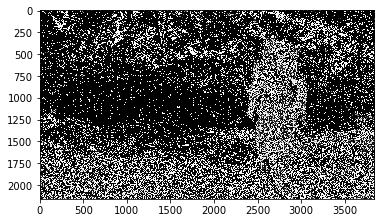

In [14]:
plt.imshow(vertical_edges_img, cmap = plt.get_cmap('gray'))

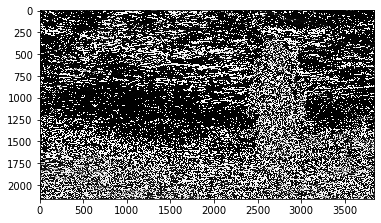

In [12]:
plt.imshow(horizontal_edges_img, cmap = plt.get_cmap('gray'))

In [28]:
edges_img = np.zeros_like(img)

In [29]:
for row in range(3, nx-2):
    for col in range(3, ny-2):
        local_pixels = new_image[row-1:row+2,col-1:col+2,0]
        
        vertical_transformed_pixels = Gy*local_pixels
        vertical_score = (vertical_transformed_pixels.sum() + 4.0)/8.0
        
        horizontal_transformed_pixels = Gx*local_pixels
        horizontal_score = (horizontal_transformed_pixels.sum()+ 4.0)/8.0
        
        edge_score = (vertical_score**2 + horizontal_score**2)**0.5
        edges_img[row,col] = [edge_score]*3
        

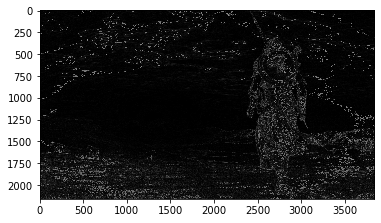

In [30]:
plt.imshow(edges_img)
# plt.savefig('assassins_3', dpi = 500, quality = 95)